In [2]:
import module.AugRotation as ar
import importlib
importlib.reload(ar)
aug = ar.AugRotation()

# Train 증강
extention = "jpg"
img_root_folder = r"..\01.Data\head\train_resized\images"
label_root_folder = r"..\01.Data\head\train_resized\labels"
aug_img_save_folder = r"..\01.Data\head\train_resized\aug_images"
aug_boximg_save_folder = r"..\01.Data\head\train_resized\aug_box_images"
aug_label_save_folder = r"..\01.Data\head\train_resized\aug_labels"

# aug.run_augment(extention, img_root_folder, label_root_folder, aug_img_save_folder, aug_boximg_save_folder, aug_label_save_folder, 4)
aug.run_specific_augment(extention, img_root_folder, label_root_folder, aug_img_save_folder, aug_boximg_save_folder, aug_label_save_folder, 2)

100%|██████████| 1630/1630 [03:54<00:00,  6.94it/s]


'완료'

In [37]:
# valid 증강
extention = "jpg"
img_root_folder = r"..\01.Data\head\valid_resized\images"
label_root_folder = r"..\01.Data\head\valid_resized\labels"
aug_img_save_folder = r"..\01.Data\head\valid_resized\aug_images"
aug_boximg_save_folder = r"..\01.Data\head\valid_resized\aug_box_images"
aug_label_save_folder = r"..\01.Data\head\valid_resized\aug_labels"

# aug.run_augment(extention, img_root_folder, label_root_folder, aug_img_save_folder, aug_boximg_save_folder, aug_label_save_folder, 4)
# aug.run_specific_augment(extention, img_root_folder, label_root_folder, aug_img_save_folder, aug_boximg_save_folder, aug_label_save_folder, 3)

100%|██████████| 466/466 [01:25<00:00,  5.47it/s]


'완료'

In [38]:
# test 증강
extention = "jpg"
img_root_folder = r"..\01.Data\head\test_resized\images"
label_root_folder = r"..\01.Data\head\test_resized\labels"
aug_img_save_folder = r"..\01.Data\head\test_resized\aug_images"
aug_boximg_save_folder = r"..\01.Data\head\test_resized\aug_box_images"
aug_label_save_folder = r"..\01.Data\head\test_resized\aug_labels"

# aug.run_augment(extention, img_root_folder, label_root_folder, aug_img_save_folder, aug_boximg_save_folder, aug_label_save_folder, 4)
# aug.run_specific_augment(extention, img_root_folder, label_root_folder, aug_img_save_folder, aug_boximg_save_folder, aug_label_save_folder, 3)

100%|██████████| 233/233 [01:10<00:00,  3.31it/s]


'완료'

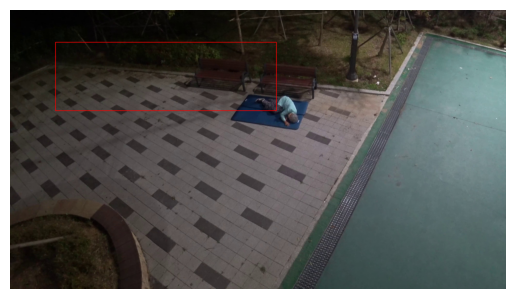

In [39]:
# 샘플 이미지 1장 출력
import module.AugRotation as ar
import importlib
importlib.reload(ar)

aug = ar.AugRotation()

img_path = r"C:\Users\HS\Downloads\images\FD_Out_H11H21H32_0028_20201012_20__275.5s.jpg"
label_path = r"C:\Users\HS\Downloads\labels\FD_Out_H11H21H32_0028_20201012_20__275.5s.txt"


aug.view_box_image(img_path, label_path)

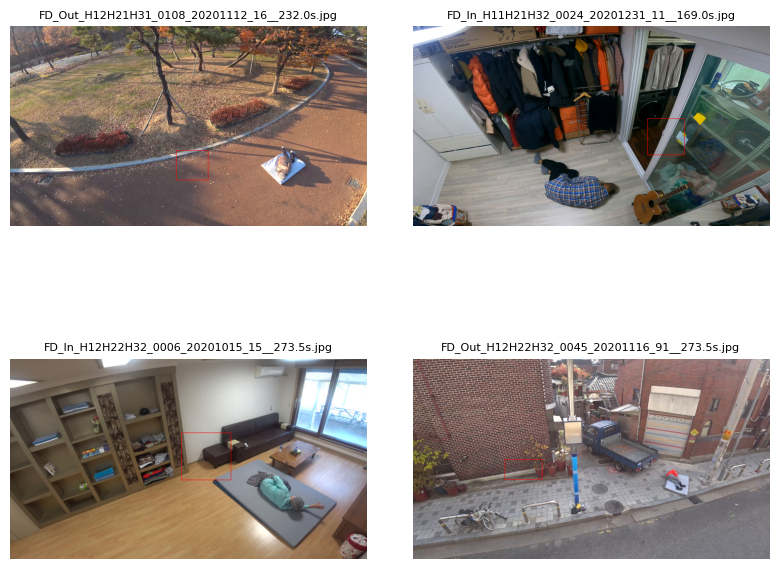

In [38]:
# 샘플 이미지 여러장 출력
import module.AugRotation as ar
import importlib
importlib.reload(ar)

aug = ar.AugRotation()
sample_img_folder = r"..\01.Data\01\train\1301\1301\rgb"
sample_label_folder = r"C:\Users\HS\Downloads\labels"
aug.view_sample_box_image(sample_img_folder, sample_label_folder, 4)

In [28]:
import json

path = r"C:\Users\HS\Downloads\Project_Main\Fallen_Labels\FD_Out_H11H22H32_0004_20210113_10__117.5s.json"
with open(path, "r") as f:
    result = json.load(f)

In [33]:
result["content"]["object"]

{'annotation': {'bboxes': [[0.503086, 0.56963193, 0.106770836, 0.14429167]],
  'names': ['actor'],
  'scores': [0.74148196],
  'ids': None},
 'algorithm': {'name_list': None,
  'model': 'CenterNet',
  'algorithm': 'CenterNet'}}

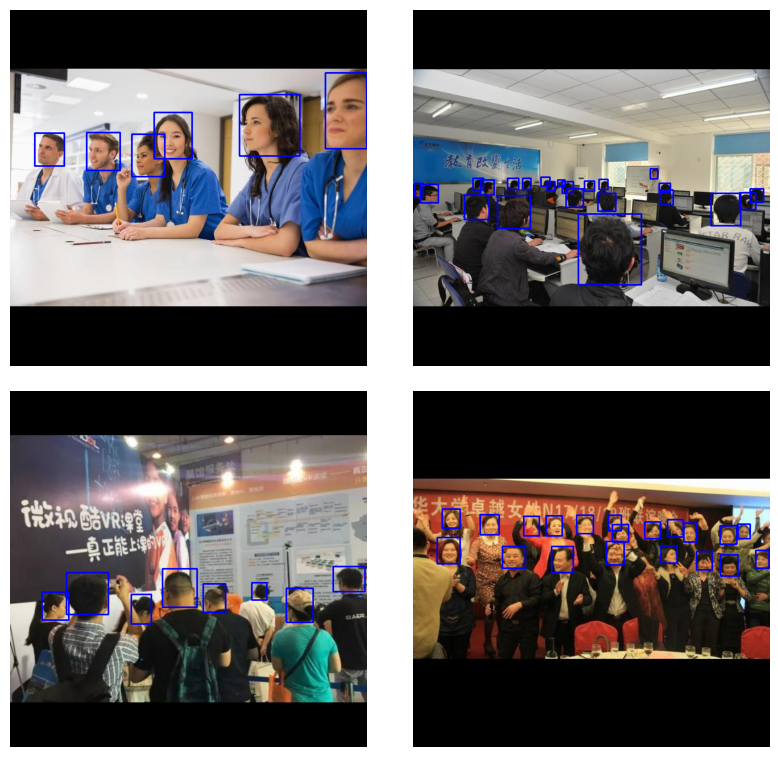

In [23]:
# 샘플 이미지 여러장 출력
import module.AugRotation as ar
import importlib
importlib.reload(ar)

aug = ar.AugRotation()  
sample_img_folder = r"..\01.Data\head\train_resized\images"
sample_label_folder = r"..\01.Data\head\train_resized\labels"
aug.view_sample_box_image(sample_img_folder, sample_label_folder, 4)

In [47]:
# 머리 갯수 측정
from glob import glob

train = r"..\01.Data\head\train_resized\labels\*"
valid = r"..\01.Data\head\valid_resized\labels\*"
test = r"..\01.Data\head\test_resized\labels\*"

count = 0
a = glob(train)
b = glob(valid)
c = glob(test)
d = []
d.extend(a)
d.extend(b)
d.extend(c)

for path in d:
    with open(path, "r") as f:
        t = f.readlines()
    for i in t:
        count += 1   
count

41749

In [2]:
# 증강 라벨에서 1 넘어가는 숫자 찾아서 1로 바꿔주기

from glob import glob

train_label_path = glob(r"..\01.Data\head\train_resized\aug_labels\*.txt")
valid_label_path = glob(r"..\01.Data\head\valid_resized\aug_labels\*.txt")
test_label_path = glob(r"..\01.Data\head\test_resized\aug_labels\*.txt")

len(train_label_path), len(valid_label_path), len(test_label_path)

(6520, 1864, 932)

In [ ]:
path_lst = []
path_lst.extend(train_label_path)
path_lst.extend(valid_label_path)
path_lst.extend(test_label_path)

with open(path_lst[0],"r") as f:
    a = f.readlines()

for i in a:
    print(i)

In [18]:
for i, path in enumerate(path_lst):
    with open(path, "r") as f:
        r = f.readlines()
        
        new_file_cont = ""
        line_new = ""
        
        for j, line in enumerate(r):
            line_s = line.split()
            for num in line_s:
                if float(num) > 1:
                    line_new = line_new + " " + "1"
                    print(num)
                else:
                    line_new = line_new + " " + num
            
            if j < len(r)-1: 
                new_file_cont = new_file_cont + line_new + "\n"
            else:
                new_file_cont = new_file_cont + line_new
   
            line_new = "" 

        with open(path, "w") as f:
            f.write(new_file_cont)
        new_file_cont = ""

1.01015625
1.00078125
1.02578125
1.02734375
1.0015625
1.04765625
1.01328125
1.01171875
1.009375
1.028125
1.01796875
1.015625
1.0171875
1.01953125
1.065625
1.015625
1.01328125
1.06328125
1.00390625
1.01171875
1.05234375
1.00234375
1.03984375
1.0015625
1.0203125
1.0296875
1.0203125
1.0125
1.00078125
1.025
1.09140625
1.00390625
1.0796875
1.0796875
1.071875
1.01328125
1.040625
1.03515625
1.01484375
1.0015625
1.0015625
1.01953125
1.0203125
1.02578125
1.003125
1.00859375
1.003125
1.02578125
1.025
1.0171875
1.003125
1.02421875
1.00546875
1.0125
1.0234375
1.05859375
1.01171875
1.02578125
1.0203125
1.03046875
1.0109375
1.02265625
1.021875
1.021875
1.00078125
1.003125
1.01484375
1.0046875
1.0265625
1.00234375
1.015625
1.0078125
1.00546875
1.0109375
1.01953125
1.034375
1.003125
1.0453125
1.075
1.0078125
1.0234375
1.01484375
1.00625
1.01953125
1.0078125
1.01328125
1.009375
1.02109375
1.0109375
1.0109375
1.01171875
1.00078125
1.00078125
1.04296875
1.0234375
1.04453125
1.03125
1.01953125
1.00234375


In [19]:
# 확인
for i, path in enumerate(path_lst):
    with open(path, "r") as f:
        r = f.readlines()
        
        new_file_cont = ""
        line_new = ""
        
        for j, line in enumerate(r):
            line_s = line.split()
            for num in line_s:
                if float(num) > 1:
                    line_new = line_new + " " + "1"
                    print(num)
                else:
                    line_new = line_new + " " + num
            
            if j < len(r)-1: 
                new_file_cont = new_file_cont + line_new + "\n"
            else:
                new_file_cont = new_file_cont + line_new
   
            line_new = "" 
